# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import random
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output Data File (CSV)
city_data_df = "output_data/cities.csv"

In [2]:
#NUM_POINTS = 50    # DEBUG 1500

# BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord'] ['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

  # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | soio
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | poronaysk
Processing Record 10 of Set 1 | urangan
Processing Record 11 of Set 1 | santa cruz
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | kerikeri
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | lala
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | akureyri
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | okhotsk
Processing Record 39 of Set 4 | soure
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | tanjungtiram
Processing Record 43 of Set 4 | oumache
Processing Record 44 of Set 4 | vadso
Processing Record 45 of Set 4 | fortaleza
Processing Record 46 of Set 4 | mumford
Processing Record 47 of Set 4 | l'govskiy
Processing Record 48 of Set 4 | roma
Processing Record 49 of Set 4 | luanda
Processing Record 0 of Set 5 | gadzhiyevo
Processing Record 1 of Set 5 | canon city
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | andalgala
Processing Record 4 of Set 5 | lysychans'k
Processing Record 5 of Set 5 | port macquarie
Processing Record 6 of Set 5 | sosnytsya
Processing Record 7 of Set 5 | napili-honokowai
Processing Record 8 of Set 5 | bac lieu
Processing Record 9 of Set 5 | muroto-misakicho
Processing Record 10 of Set 5 | santa ana
Processing Record 11 of Set 5 | hasaki
Processin

Processing Record 29 of Set 8 | arawa
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | preobrazheniye
Processing Record 32 of Set 8 | uthal
Processing Record 33 of Set 8 | puerto colombia
Processing Record 34 of Set 8 | kupang
Processing Record 35 of Set 8 | zhuanghe
Processing Record 36 of Set 8 | port elizabeth
Processing Record 37 of Set 8 | roghun
Processing Record 38 of Set 8 | sona
Processing Record 39 of Set 8 | amos
Processing Record 40 of Set 8 | jose mariano jimenez
City not found. Skipping...
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | ust-nera
Processing Record 43 of Set 8 | umm ruwaba
Processing Record 44 of Set 8 | kon tum
Processing Record 45 of Set 8 | volodymyr-volynskyi
Processing Record 46 of Set 8 | park forest village
Processing Record 47 of Set 8 | lebu
Processing Record 48 of Set 8 | amga
Processing Record 49 of Set 8 | maragogi
Processing Record 0 of Set 9 | san antonio de pale
Processing Record 1 of Set 9 | ay

Processing Record 16 of Set 12 | springbok
Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | sorong
Processing Record 19 of Set 12 | kailua-kona
Processing Record 20 of Set 12 | zambezi
Processing Record 21 of Set 12 | cestos city
Processing Record 22 of Set 12 | china
Processing Record 23 of Set 12 | barentu
Processing Record 24 of Set 12 | albina
Processing Record 25 of Set 12 | bartlesville
Processing Record 26 of Set 12 | el jadid
Processing Record 27 of Set 12 | okha
Processing Record 28 of Set 12 | touba
Processing Record 29 of Set 12 | viedma
Processing Record 30 of Set 12 | vernon
Processing Record 31 of Set 12 | camana
Processing Record 32 of Set 12 | qamdo
Processing Record 33 of Set 12 | mariental
Processing Record 34 of Set 12 | san carlos de bariloche
Processing Record 35 of Set 12 | lerwick
Processing Record 36 of Set 12 | ipatovo
Processing Record 37 of Set 12 | saint croix
Processing Record 38 of Set 12 | cannonvale
Processing Record 39 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.58,85,100,11.42,SH,1691543116
1,soio,-6.1349,12.3689,21.24,91,8,2.61,AO,1691542987
2,ancud,-41.8697,-73.8203,10.75,96,100,11.71,CL,1691542821
3,oranjemund,-28.5500,16.4333,11.93,93,4,4.51,NA,1691543117
4,petropavlovsk-kamchatsky,53.0452,158.6483,19.33,56,75,3.00,RU,1691542818


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.58,85,100,11.42,SH,1691543116
1,soio,-6.1349,12.3689,21.24,91,8,2.61,AO,1691542987
2,ancud,-41.8697,-73.8203,10.75,96,100,11.71,CL,1691542821
3,oranjemund,-28.5500,16.4333,11.93,93,4,4.51,NaN,1691543117
4,petropavlovsk-kamchatsky,53.0452,158.6483,19.33,56,75,3.00,RU,1691542818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

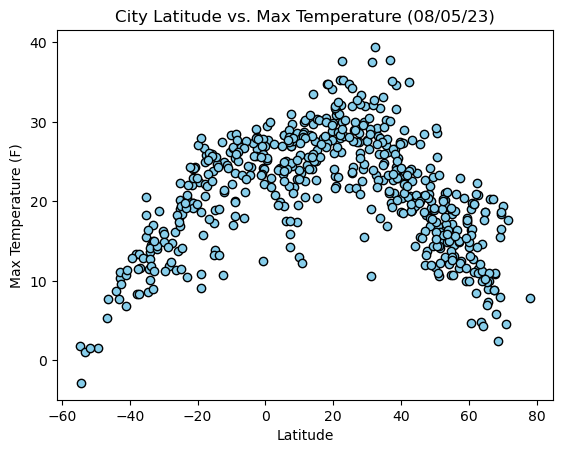

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

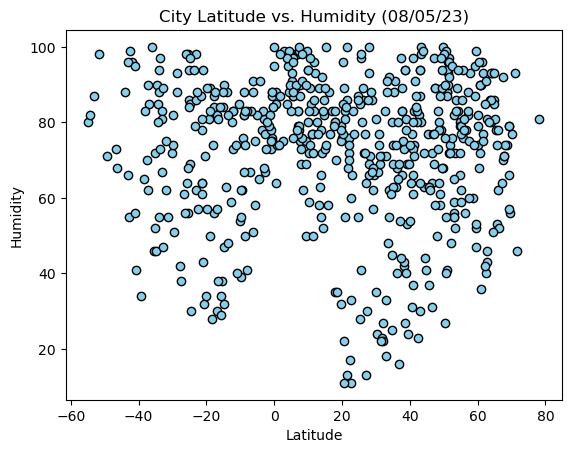

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

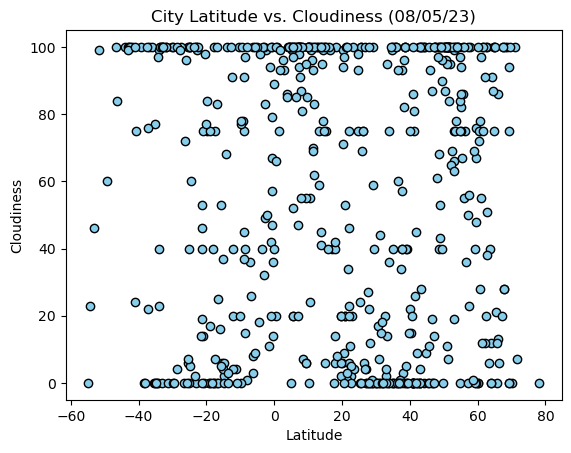

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

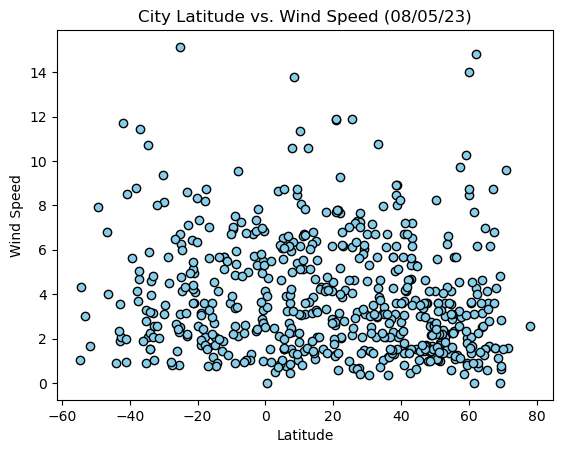

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,petropavlovsk-kamchatsky,53.0452,158.6483,19.33,56,75,3.00,RU,1691542818
6,tura,25.5198,90.2201,23.64,97,100,2.15,IN,1691542946
7,poronaysk,49.2167,143.1167,17.31,78,100,1.67,RU,1691543117
10,georgetown,5.4112,100.3354,28.30,87,20,1.54,MY,1691542976
14,lala,7.9745,123.7458,29.71,69,87,2.29,PH,1691543118


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.58,85,100,11.42,SH,1691543116
1,soio,-6.1349,12.3689,21.24,91,8,2.61,AO,1691542987
2,ancud,-41.8697,-73.8203,10.75,96,100,11.71,CL,1691542821
3,oranjemund,-28.5500,16.4333,11.93,93,4,4.51,NaN,1691543117
5,ushuaia,-54.8000,-68.3000,1.81,80,0,1.03,AR,1691542895


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.23x + 30.27
The r-squared is: -0.6477863624333273
The regression displays moderate negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


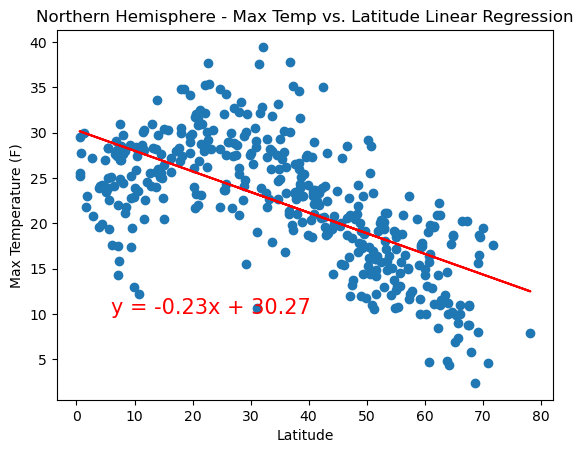

In [16]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays moderate negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.09x + 76.1
The r-squared is: -0.08852373565564546
The regression displays no correlation.


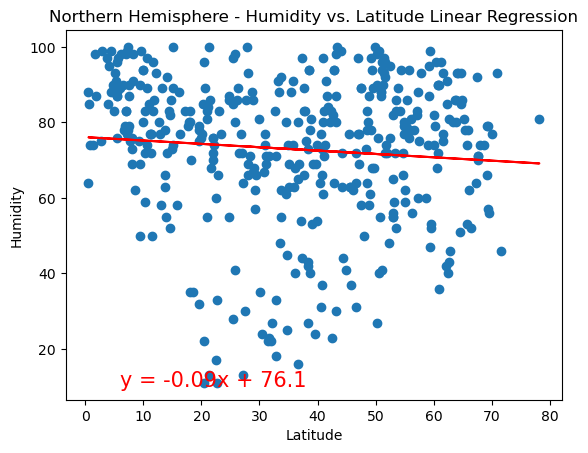

In [17]:
# Northern Hemisphere 
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation.")
#print("In the nothern hemisphere, as you move away from the equator the humidity is fa.")
plt.show()

Regression line equation is: y = -0.02x + 71.77
The r-squared is: -0.0160028613989768
The regression displays a negative correlation.


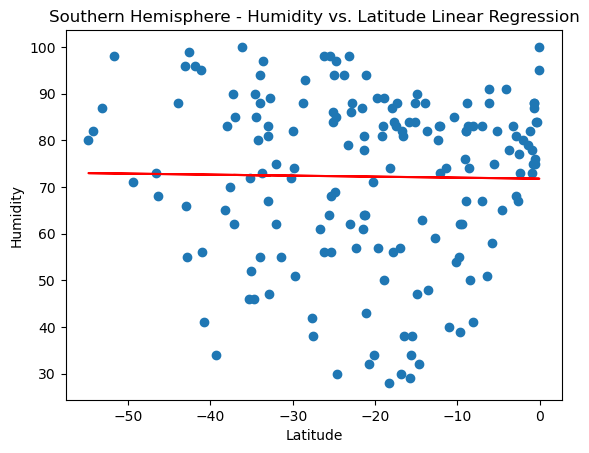

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

**Discussion about the linear relationship:** There is weak correlation between the southern and norhern hemisphere vs. humidity. There is slightly greater humidity as you move away from the 

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.18x + 62.82
The r-squared is: -0.08412444084442912
The regression displays a negative correlation.


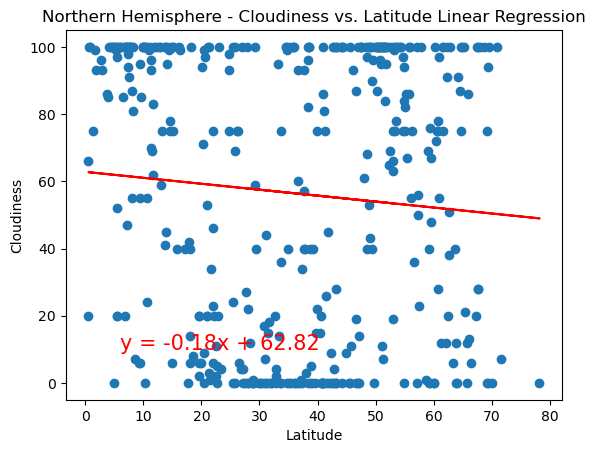

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

Regression line equation is: y = -0.31x + 46.53
The r-squared is: -0.10232704918278575
The regression displays no correlation.


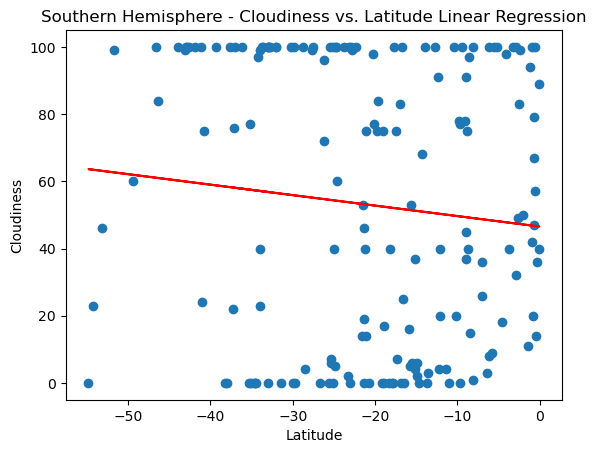

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation.")
plt.show()

**Discussion about the linear relationship:  There is very weak correlation between the southern and norhern hemisphere vs. cloudiness. However, because of the humidity closer to the eqator in the souther hemisphere we do see some more cloud coverage.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.02x + 4.46
The r-squared is: -0.15463934408674718
The regression displays weak negative correlation.


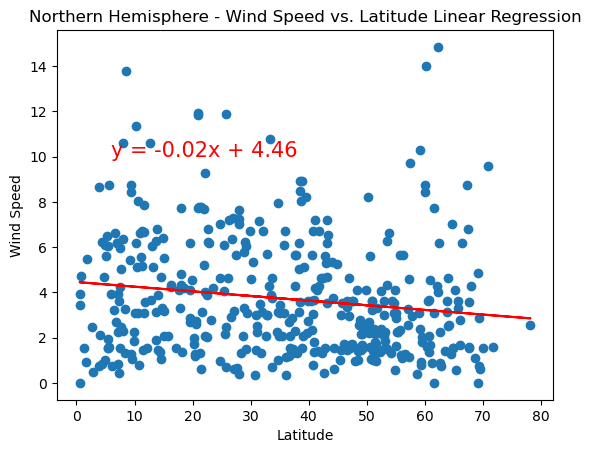

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays weak negative correlation.")
#print("In the nothern hemisphere, as you move away from the equator)
plt.show()

Regression line equation is: y = 0.0x + 4.18
The r-squared is: 0.00860004245137074
The regression displays no correlation.


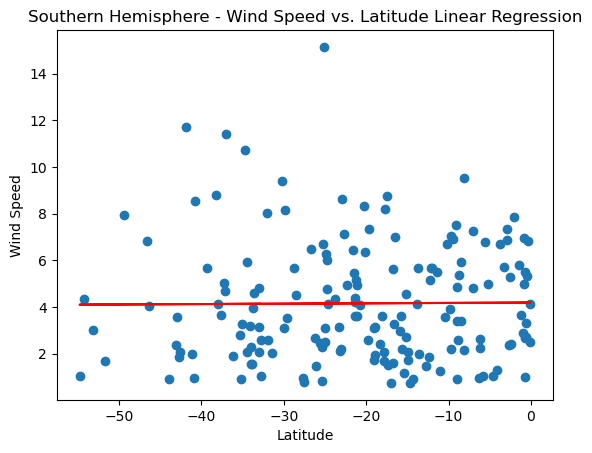

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation.")
#print("In the nothern hemisphere, as you move away from the equator the humidity is fa.")
plt.show()

**Discussion about the linear relationship:** The regression does not display much of a correlation between the data sets however, there is much more wind activity the closer you are to the eqautor and in the Northern Hemisphere.